# BD3P3 ML-II Lab Test

## 20BDA21 - Joel Bharat Monis
## 20BDA23 - Manu Tom
## 20BDA35 - Nidhi Teresa George


## Background

#### The COVID-19 pandemic is among the deadliest infectious diseases to have emerged in recent history. As with all past pandemics, the specific mechanism of its emergence in humans remains unknown. Following a surge in cases of COVID-19 in April 2020, India became the third-worst affected country worldwide. This necessitated countrywide lockdown and resulted in mass exodus of migrants. Numerous professionals who relied on IT backed infrastructure and procedures for their work were all ensconced in their houses and Work From Home (WFH) began for them. As the lockdown dragged on, several researchers and organisations took this opportunity to assess the effect and efficacy of the lockdown on work related issues.  Several papers have been published, which study the effect of WFH.

#### However, WFH is not a new phenomenon.  It is attributed to a NASA scientist in the early 1973, who coined the term telecommuting to avoid the Los Angeles traffic. The idea of telecommuting was very different from what it is today, especially when there was no internet. Since then telecommuting has come a long way. The phone conferences and the, once novel, video calls have become the norm and permeate every aspect of professional sphere of almost every large company worth its salt – not to mention the myriad smaller concerns who have adopted this technology, much to their benefit. The constant technology based advancement of long distance office communication has made WFH a run-of-the-mill convenience adopted by numerous professionals and households. Availability of Internet was never appreciated more.

#### However, WFH has not been a smooth transition for everybody. Some have loved the transition, enjoyed the time with family, benefited from savings incurred due to lesser travel and generally been more productive. Some others have found the transition challenging, due to work cultures of groups they work with, assumption by the bosses that they are always available at their beck and call for work – now that they are at home etc.

#### There are several papers which bring out the pros and cons of WFH. Several of them are listed in the references.

#### In 2010-11, Ctrip, the largest travel agency in China experimented with the concept of work from home with a set of employees for a period of 9 months, under the watchful eye of Stanford University researchers. The research led to the conclusion that there was a general increase of productivity of WFH workers to the tune of 13%. On completion of the experiment, WFH was rolled out to all employees which led to the gains from WFH to rise to 22%. This was a scientific approach to ascertaining the efficacy of WFH. However, the company deliberately tried out this concept without any external pressure, which gave them enough time to prepare and orient the volunteers to the new regimen.

#### This luxury was not available when Covid-19 hit. In just a few weeks thousands of IT employees were isolated in their houses/homes in an unprecedented way. There were challenges faced by both the employees and the management to structure the new arrangement to make it efficient., There is another paper which brings out several hurdles faced by the individuals while trying to adjust to the new routine. Microsoft has had a favourable experience with WFH. Being an IT behemoth, it has had the advantage of researching the state of its employees and has instituted changes every week to make the experience better for all the affected professionals.

#### Comprehensively, the papers bring out a mixed bag of findings which has been used to tweak the WFH system to reduce the pressure on the employees and compensate for the social disconnect that everyone experienced.


## Data

#### The data used by many companies is extensive and has been processed over a span of several weeks during which their corrective measures were also implemented. The data used in this study has been gleaned from the data and observations available online.

## Problem Statement

#### Work from home: employee productivity and preference?
#### How working from home affects employee productivity?

#### What do employees prefer and why?

## Task

- To ascertain the factors which affect employee productivity and preference for WFH.
- To ascertain whether those working from home experienced an increase in productivity.
- To ascertain whether the employees working from home prefer the arrangement.



## Hypothesis

Null Hypothesis: The outcome variable is independent of the independent variables.

Alternate Hypothesis: The outcome variable is not independent of the independent variables.

## Approach

- Procure data (Employee Productivity and Preference Data)
- Carry out EDA 
- Test the hypothesis. Carry out statistical tests to ascertain the features which affect the outcome variable
- Build Machine Learning Pipeline


# Importing packages relevant for analysis and modelling

In [402]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency 
%matplotlib inline

# I - Productivity

## Data
Dataset, Data Description and Data information

In [403]:
pd.set_option('display.max_columns', None)
productivity = pd.read_csv("/content/Productivity.csv")
productivity.head()

,Gender,Age,Marital Status,Children,No of Children,Experience (in months),Efficacy of team meetings,Social interaction,Overwork,Stress,Motivation,Innovative Climate,Work Environment,No of working hrs per week,Uninterrupted Working hrs per week,Number of stretches of uninterrupted working (min 1 hr),Average no of meetings attended per week,Hrs spent in meetings per week,Salary (Monthly),EP Outcome
0,Female,23,Single,N,0,18,4,3,1,2,4,5,3,45,28,12,7,6,43420,1
1,Male,24,Single,N,0,19,4,3,1,2,5,4,3,44,29,12,7,5,35502,1
2,Male,24,Single,N,0,17,4,4,1,3,3,4,4,44,29,14,9,4,37848,1
3,Male,22,Single,N,0,17,2,3,3,5,2,2,2,48,37,12,9,6,53072,0
4,Male,25,Married,Y,1,24,4,5,3,1,4,3,5,40,27,14,9,4,45212,1


**Data Description**
- Gender - Male/Female
- Age
- Marital Status - Whether married or not - Single / Married
- Children - Whether the individual has children or not - Y/N
- No of children
- Experience (in months) - Work experience of the individual in months 
- Efficacy of team meetings - The individual's perception of the efficacy of the meetings attended by him/her - expressed on a Likert scale from 1 to 5
- Social Interaction - The individual's perception of social interaction while working from home - expressed on a Likert scale from 1 to 5
- Overwork - The individual's perception of overwork during WFH - expressed on a Likert scale from 1 to 5
- Stress - The individual's perception of stress during WFH - expressed on a Likert scale from 1 to 5
- Motivation - The individual's perception of own motivation - expressed on a Likert scale from 1 to 5
- Innovative Climate - The individual's perception of Innovative Climate in the company - expressed on a Likert scale from 1 to 5
- Work Environment - The individual's perception of Work Environment in the company - expressed on a Likert scale from 1 to 5
- No of working hrs per week - The  no of working hrs put in by the individual, per week
- Uninterrupted Working hrs per week - The no of uninterrupted Working hrs per week 
- Number of stretches of uninterrupted working (min 1 hr) - The number of stretches of uninterrupted working of minimum 1 hr durations.
- Average no of meetings attended per week - The average no of meetings attended per week by the individual
- Hrs spent in meetings per week - The number of hours spent in meetings per week by the individual
- Salary (Monthly) - The monthly salary
- EP Outcome - What is the preference of the individual towards own productivity - 0(not as productive)/1(as much or more productive)

In [404]:
productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Gender                                                   250 non-null    object
 1   Age                                                      250 non-null    int64 
 2   Marital Status                                           250 non-null    object
 3   Children                                                 250 non-null    object
 4   No of Children                                           250 non-null    int64 
 5   Experience (in months)                                   250 non-null    int64 
 6   Efficacy of team meetings                                250 non-null    int64 
 7   Social interaction                                       250 non-null    int64 
 8   Overwork                                

In [405]:
productivity.isnull().sum()
# No Null values

Gender                                                     0
Age                                                        0
Marital Status                                             0
Children                                                   0
No of Children                                             0
Experience (in months)                                     0
Efficacy of team meetings                                  0
Social interaction                                         0
Overwork                                                   0
Stress                                                     0
Motivation                                                 0
Innovative Climate                                         0
Work Environment                                           0
No of working hrs per week                                 0
Uninterrupted Working hrs per week                         0
Number of stretches of uninterrupted working (min 1 hr)    0
Average no of meetings a

In [406]:
productivity.duplicated().sum()
# No duplicate records

0

In [407]:
productivity.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,250.0,23.960,0.976840,22.0,23.0,24.0,25.00,25.0
No of Children,250.0,0.260,0.608177,0.0,0.0,0.0,0.00,2.0
Experience (in months),250.0,19.564,5.049743,12.0,16.0,19.0,23.00,30.0
Efficacy of team meetings,250.0,3.436,1.221422,1.0,3.0,3.0,4.75,5.0
Social interaction,250.0,3.432,1.256859,1.0,3.0,3.0,5.00,5.0
Overwork,250.0,2.600,1.241841,1.0,2.0,3.0,3.00,5.0
Stress,250.0,2.768,1.268310,1.0,2.0,3.0,4.00,5.0
Motivation,250.0,3.404,1.338638,1.0,3.0,4.0,5.00,5.0
Innovative Climate,250.0,3.188,1.209341,1.0,2.0,3.0,4.00,5.0
Work Environment,250.0,3.308,1.278937,1.0,3.0,3.0,4.00,5.0


In [408]:
productivity.describe(include =['O']).T

,count,unique,top,freq
Gender,250,2,Male,130
Marital Status,250,2,Single,163
Children,250,2,N,197


## Exploratory Data Analysis on Productivity of Employee

### 1. Outlier analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text major ticklabel objects>)

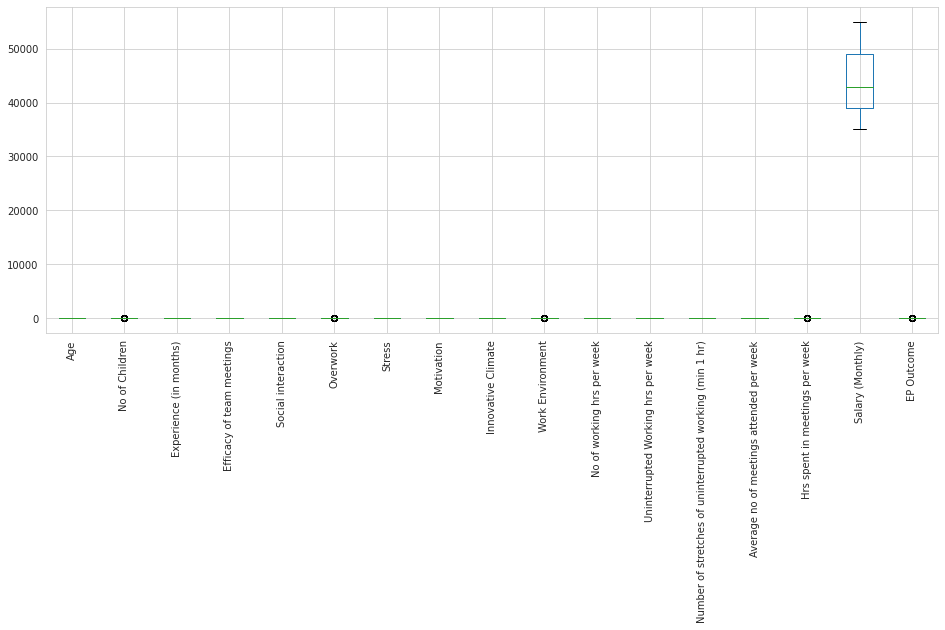

In [409]:
productivity.plot.box(figsize = (16,6))
plt.xticks(rotation = 90)

In the above plot, there are no outliers in Salary. The scale of representation distorts the depiction of data of the other features. Hence, it is removed and plotted again in the next plot for better visibilty of the other features.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

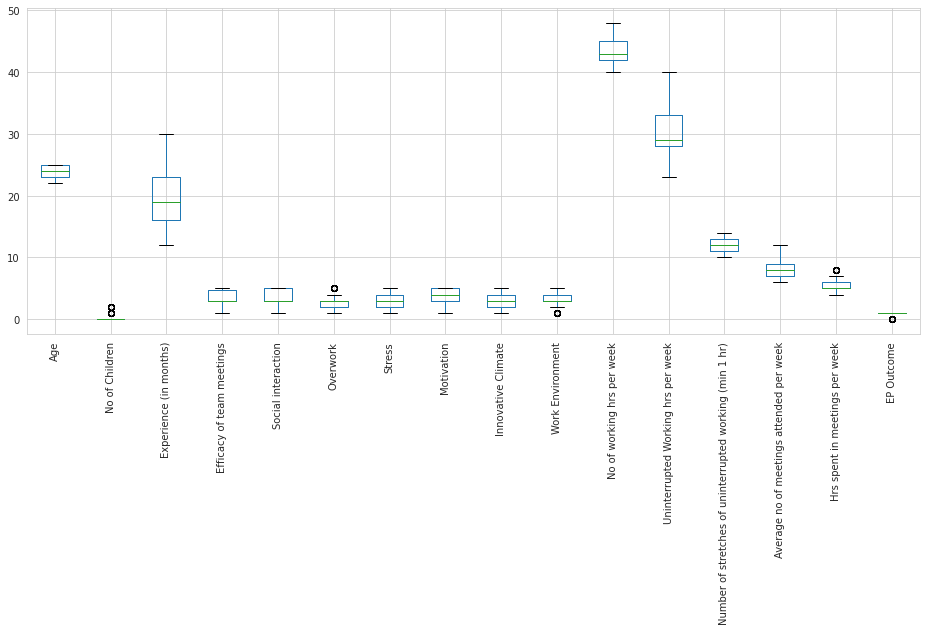

In [410]:
dfp = productivity.drop(["Salary (Monthly)"], axis = 1)
dfp.plot.box(figsize = (16,6))
plt.xticks(rotation = 90)

In the above plot we can see that there are very few outliers and they are not severe in nature. In this study presence of outliers is important to capture the full range of perspectives. 

### 2. Data Visualisation

In [411]:
#function for crosstabs
def cross_tab_pp(x,y):
    crtabp = pd.crosstab(productivity[x], productivity[y])
    return crtabp

In [412]:
#Productivity perspective of the people

p = productivity['EP Outcome'].value_counts()
print(p)

1    202
0     48
Name: EP Outcome, dtype: int64


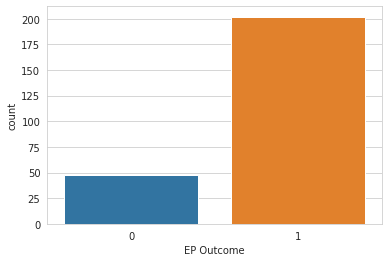

In [413]:
sns.countplot(x=productivity['EP Outcome'])

The data leans towards class 1. There is imbalance in the data which will have to be addressed during modelling.

In [414]:
#Age v/s EP Outcome

cross_tab_pp('Age','EP Outcome')

EP Outcome,0,1
Age,,
22,14,7
23,11,50
24,10,65
25,13,80


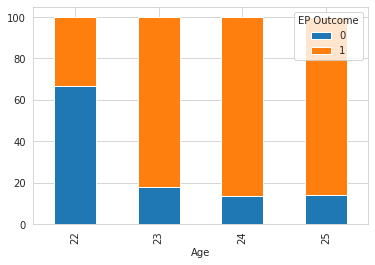

In [415]:
table=pd.crosstab(productivity['Age'],productivity['EP Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

Majority of the employees of age 22 feel that their productivity has deteriorated, while an overwhelming majority of the remaining age categories feel that their productivity is either the same or improved.

In [416]:
#Gender v/s EP Outcome

cross_tab_pp('Gender','EP Outcome')

EP Outcome,0,1
Gender,,
Female,26,94
Male,22,108


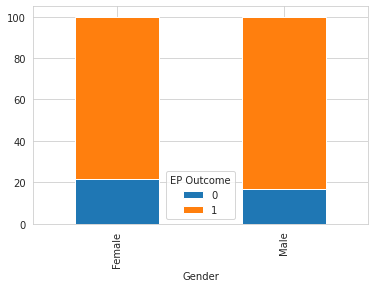

In [417]:
table=pd.crosstab(productivity['Gender'],productivity['EP Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

Almost 80% of both males and females working from home feel their productivity has improved or is the same.

In [418]:
#Marital Status v/s EP Outcome

cross_tab_pp('Marital Status','EP Outcome')

EP Outcome,0,1
Marital Status,,
Married,11,76
Single,37,126


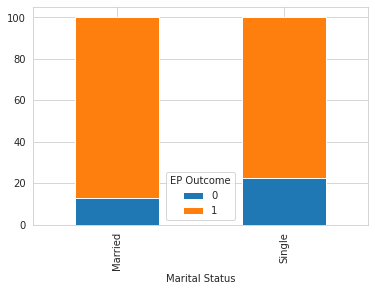

In [419]:
table=pd.crosstab(productivity['Marital Status'],productivity['EP Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

Almost 4/5th of the employees, whether married or single felt that their productivity had improved or remained the same.

In [420]:
#Children v/s EP Outcome

cross_tab_pp('Children','EP Outcome')

EP Outcome,0,1
Children,,
N,36,161
Y,12,41


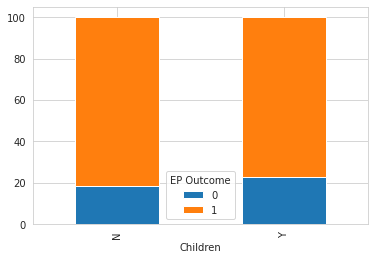

In [421]:
table=pd.crosstab(productivity['Children'],productivity['EP Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

ALmost 80% of employees in both categories of having children and not having children felt that their productivity has improved or remained the same.

In [422]:
#No of Children v/s EP Outcome

cross_tab_pp('No of Children','EP Outcome')

EP Outcome,0,1
No of Children,,
0,44,163
1,2,19
2,2,20


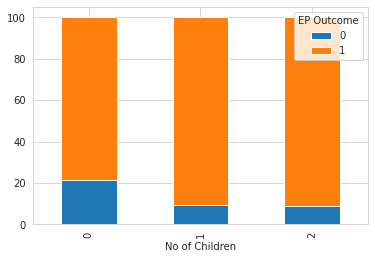

In [423]:
table=pd.crosstab(productivity['No of Children'],productivity['EP Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

The above plot corroborates the previous observation of higher or same level of productivity among employees having children.

In [424]:
#Work Experience of the Employee

productivity['Experience (in months)'].describe().T

count    250.000000
mean      19.564000
std        5.049743
min       12.000000
25%       16.000000
50%       19.000000
75%       23.000000
max       30.000000
Name: Experience (in months), dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


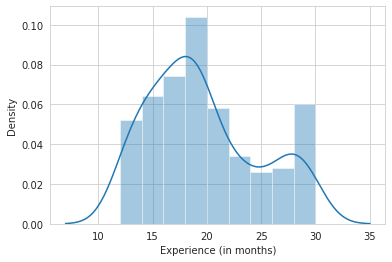

In [425]:
sns.distplot(productivity['Experience (in months)'])

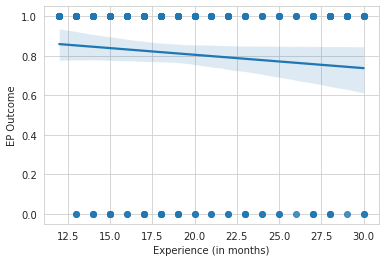

In [426]:
sns.regplot(x="Experience (in months)", y="EP Outcome", data=productivity)

The segment of employees having 18-20 months of work experience are more in number than any other segment.

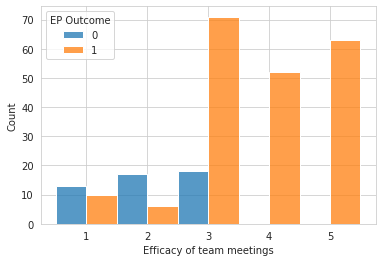

In [427]:
# Efficacy of team meetings v/s EP Outcome

sns.histplot(productivity, x="Efficacy of team meetings", hue="EP Outcome", discrete=True, multiple="dodge")

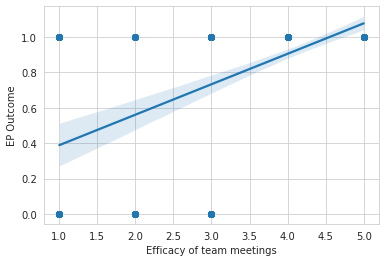

In [428]:
sns.regplot(x="Efficacy of team meetings", y="EP Outcome", data=productivity)

The employees who felt that they were as or more productive, found the team meetings more efficacious compared to those who felt that their productivity had dropped.

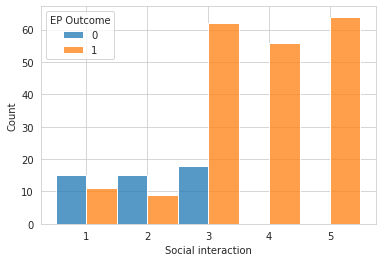

In [429]:
# Social interaction v/s EP Outcome

sns.histplot(productivity, x="Social interaction", hue="EP Outcome", discrete=True, multiple="dodge")

The employees who felt that they were as or more productive, found social interaction more satisfying compared to those who felt that their productivity had dropped.

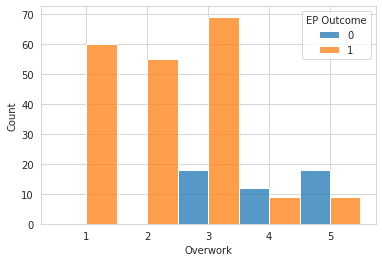

In [430]:
# Overwork v/s EP Outcome

sns.histplot(productivity, x="Overwork", hue="EP Outcome", discrete=True, multiple="dodge")

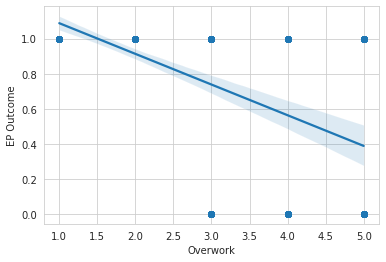

In [431]:
sns.regplot(x="Overwork", y="EP Outcome", data=productivity)

The employees who felt that they were lesser productive, complained of overwork compared to those who felt that their productivity was same or had improved.

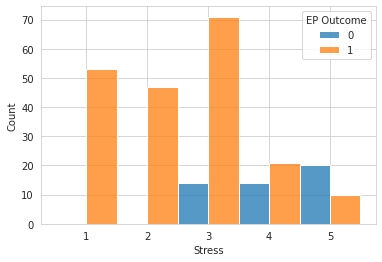

In [432]:
# Stress v/s EP Outcome

sns.histplot(productivity, x="Stress", hue="EP Outcome", discrete=True, multiple="dodge")

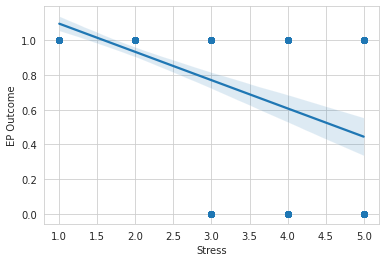

In [433]:
sns.regplot(x="Stress", y="EP Outcome", data=productivity)

The employees who felt that they were lesser productive, complained of more stress compared to those who felt that their productivity was same or had improved.

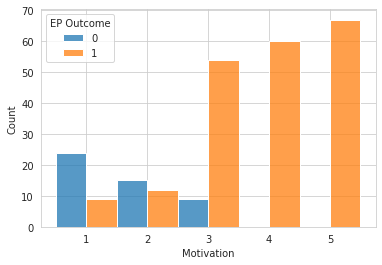

In [434]:
# Motivation v/s EP Outcome

sns.histplot(productivity, x="Motivation", hue="EP Outcome", discrete=True, multiple="dodge")

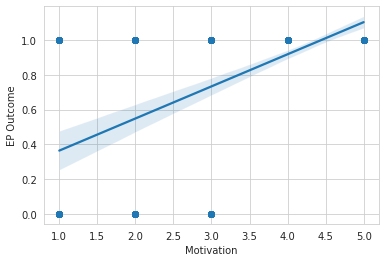

In [435]:
sns.regplot(x="Motivation", y="EP Outcome", data=productivity)

The employees who felt that they were as or more productive were more motivated compared to those who felt that their productivity had dropped.

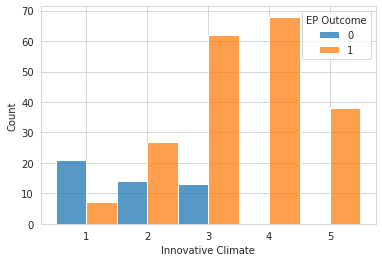

In [436]:
# Innovative Climate v/s EP Outcome

sns.histplot(productivity, x="Innovative Climate", hue="EP Outcome", discrete=True, multiple="dodge")

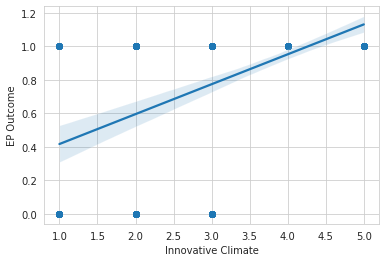

In [437]:
sns.regplot(x="Innovative Climate", y="EP Outcome", data=productivity)

The employees who felt that they were as or more productive felt that the company climate was supported innovation compared to those who felt that their productivity had dropped.

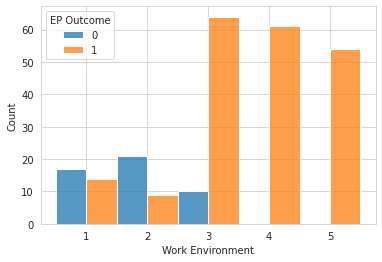

In [438]:
# Work Environment v/s EP Outcome|

sns.histplot(productivity, x="Work Environment", hue="EP Outcome", discrete=True, multiple="dodge")

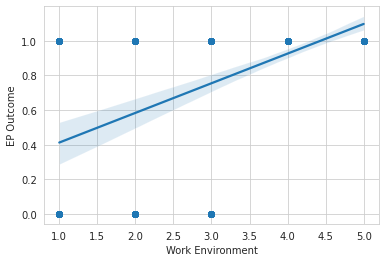

In [439]:
sns.regplot(x="Work Environment", y="EP Outcome", data=productivity)

The employees who felt that they were as or more productive felt that the work environment was conducive and friendly compared to those who felt that their productivity had dropped.

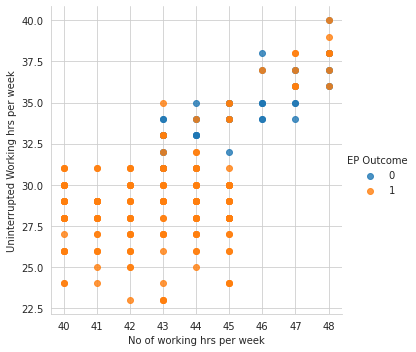

In [440]:
# No of working hrs per week v/s Uninterrupted Working hrs per week hued with EP Outcome
sns.lmplot(x='No of working hrs per week', y='Uninterrupted Working hrs per week', hue='EP Outcome', 
           data=productivity, 
           fit_reg=False)

The working hours put in by the employees who feel that their productivity has reduced is in the higher regime compared to majority of those who feel that their productivity is the same or better. Also, the former have more uninterrupted working hours compared to the latter.

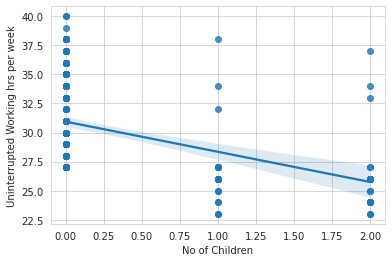

In [441]:
# No of Children v/s Uninterrupted Working hrs per week
sns.regplot(x="No of Children", y="Uninterrupted Working hrs per week", data=productivity)

The employees having children have lesser uninterrupted working hours compared to those not having children.

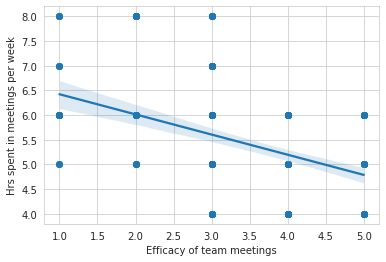

In [442]:
# Efficacy of team meetings v/s Hrs spent in meetings per week
sns.regplot(x="Efficacy of team meetings", y="Hrs spent in meetings per week", data=productivity)

Those employees who spent more time in meetings felt that the meetings were less efficacious.

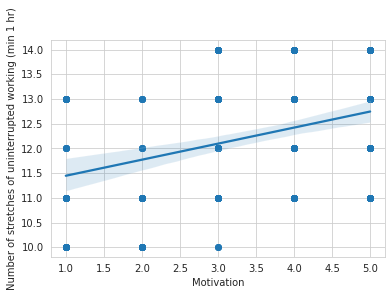

In [443]:
# Efficacy of Motivation v/s Number of stretches of uninterrupted working (min 1 hr)
sns.regplot(x="Motivation", y="Number of stretches of uninterrupted working (min 1 hr)", data=productivity)

Those employees who were more motivated reperted more number of stretches of uninterrupted working.

## Statistical Analysis and Hypothesis Testing

### 1 Correlation

In [444]:
productivity.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,250.0,23.960,0.976840,22.0,23.0,24.0,25.00,25.0
No of Children,250.0,0.260,0.608177,0.0,0.0,0.0,0.00,2.0
Experience (in months),250.0,19.564,5.049743,12.0,16.0,19.0,23.00,30.0
Efficacy of team meetings,250.0,3.436,1.221422,1.0,3.0,3.0,4.75,5.0
Social interaction,250.0,3.432,1.256859,1.0,3.0,3.0,5.00,5.0
Overwork,250.0,2.600,1.241841,1.0,2.0,3.0,3.00,5.0
Stress,250.0,2.768,1.268310,1.0,2.0,3.0,4.00,5.0
Motivation,250.0,3.404,1.338638,1.0,3.0,4.0,5.00,5.0
Innovative Climate,250.0,3.188,1.209341,1.0,2.0,3.0,4.00,5.0
Work Environment,250.0,3.308,1.278937,1.0,3.0,3.0,4.00,5.0


In [445]:
pd.DataFrame(abs(productivity.corr()['EP Outcome']).sort_values(ascending = False))

,EP Outcome
EP Outcome,1.000000
Motivation,0.626319
Uninterrupted Working hrs per week,0.578307
Work Environment,0.555240
Overwork,0.550652
Innovative Climate,0.547141
Efficacy of team meetings,0.532598
Social interaction,0.532219
Stress,0.522600
Hrs spent in meetings per week,0.501158


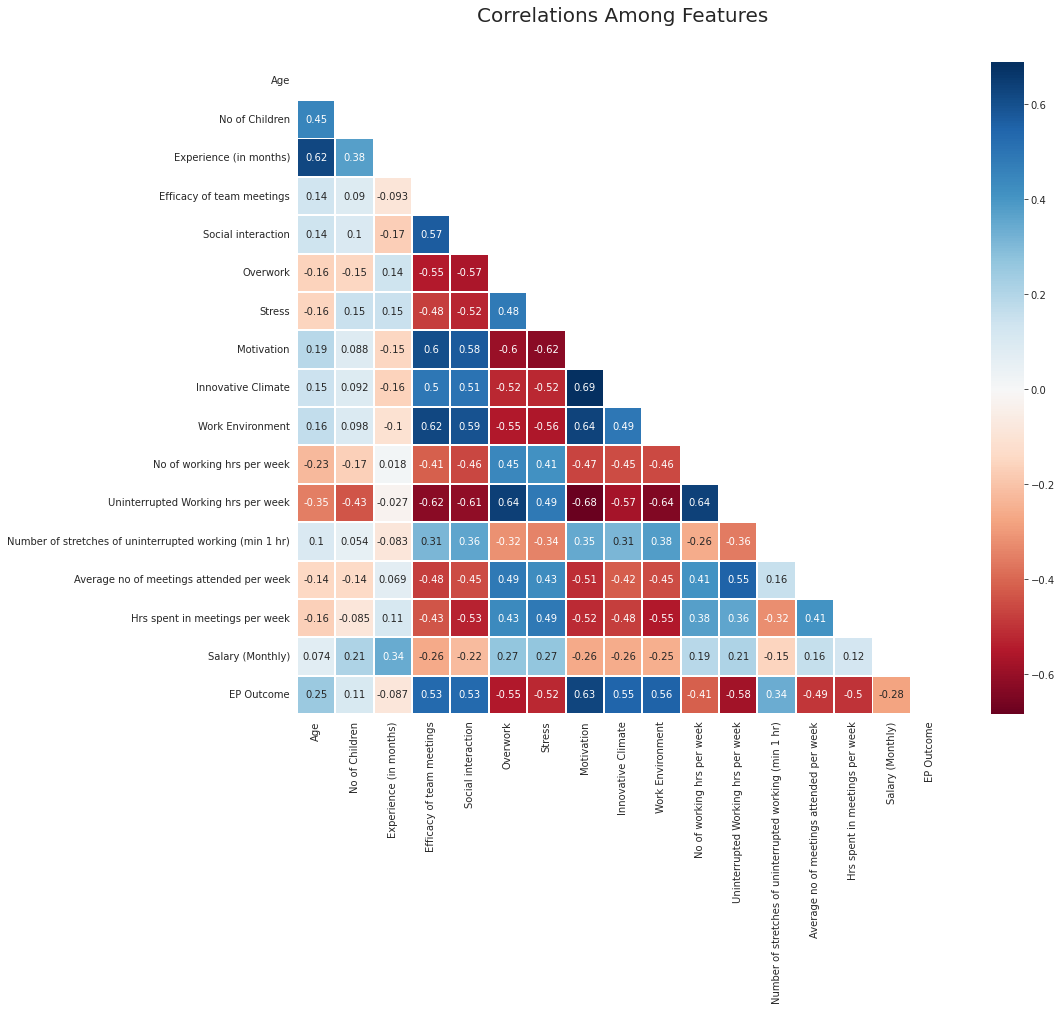

In [446]:
mask = np.zeros_like(productivity.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(productivity.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

### 2 Data Transformation

In [447]:
le=pre.LabelEncoder()
lt_2= productivity.select_dtypes(exclude = ['float','int']).columns.to_list()

In [448]:
for x in lt_2:
    productivity[x]=le.fit_transform(productivity[x])
productivity.head()

,Gender,Age,Marital Status,Children,No of Children,Experience (in months),Efficacy of team meetings,Social interaction,Overwork,Stress,Motivation,Innovative Climate,Work Environment,No of working hrs per week,Uninterrupted Working hrs per week,Number of stretches of uninterrupted working (min 1 hr),Average no of meetings attended per week,Hrs spent in meetings per week,Salary (Monthly),EP Outcome
0,0,23,1,0,0,18,4,3,1,2,4,5,3,45,28,12,7,6,43420,1
1,1,24,1,0,0,19,4,3,1,2,5,4,3,44,29,12,7,5,35502,1
2,1,24,1,0,0,17,4,4,1,3,3,4,4,44,29,14,9,4,37848,1
3,1,22,1,0,0,17,2,3,3,5,2,2,2,48,37,12,9,6,53072,0
4,1,25,0,1,1,24,4,5,3,1,4,3,5,40,27,14,9,4,45212,1


### 3 Hypothesis Testing

In [449]:
xx = productivity.drop('EP Outcome',axis=1)
yy = productivity['EP Outcome']

In [450]:
chi_scores = chi2(xx,yy)

In [451]:
chi_scores

(array([4.34437675e-01, 6.23984143e-01, 1.28664531e+00, 4.04632916e-01,
        4.16412795e+00, 2.42868426e+00, 3.06673664e+01, 3.24643469e+01,
        4.47829398e+01, 3.95205961e+01, 5.14195108e+01, 3.41960901e+01,
        3.79571521e+01, 4.92136711e+00, 3.66942821e+01, 3.70963911e+00,
        1.97109072e+01, 1.51400661e+01, 1.51926482e+04]),
 array([5.09819444e-01, 4.29570595e-01, 2.56667100e-01, 5.24706273e-01,
        4.12886622e-02, 1.19132855e-01, 3.06273030e-08, 1.21399399e-08,
        2.20132341e-11, 3.24617595e-10, 7.45935023e-13, 4.98289677e-09,
        7.23154865e-10, 2.65265187e-02, 1.38184151e-09, 5.40990870e-02,
        9.00857245e-06, 9.98221451e-05, 0.00000000e+00]))

In [452]:
ddd = pd.DataFrame(chi_scores, columns = xx.columns.to_list())
ddd

,Gender,Age,Marital Status,Children,No of Children,Experience (in months),Efficacy of team meetings,Social interaction,Overwork,Stress,Motivation,Innovative Climate,Work Environment,No of working hrs per week,Uninterrupted Working hrs per week,Number of stretches of uninterrupted working (min 1 hr),Average no of meetings attended per week,Hrs spent in meetings per week,Salary (Monthly)
0,0.434438,0.623984,1.286645,0.404633,4.164128,2.428684,3.066737e+01,3.246435e+01,4.478294e+01,3.952060e+01,5.141951e+01,3.419609e+01,3.795715e+01,4.921367,3.669428e+01,3.709639,19.710907,15.140066,15192.648189
1,0.509819,0.429571,0.256667,0.524706,0.041289,0.119133,3.062730e-08,1.213994e-08,2.201323e-11,3.246176e-10,7.459350e-13,4.982897e-09,7.231549e-10,0.026527,1.381842e-09,0.054099,0.000009,0.000100,0.000000


In [453]:
p_values = pd.Series(chi_scores[1],index = xx.columns)
p_values.sort_values(ascending = False , inplace = True)

In [454]:
p_values

Children                                                   5.247063e-01
Gender                                                     5.098194e-01
Age                                                        4.295706e-01
Marital Status                                             2.566671e-01
Experience (in months)                                     1.191329e-01
Number of stretches of uninterrupted working (min 1 hr)    5.409909e-02
No of Children                                             4.128866e-02
No of working hrs per week                                 2.652652e-02
Hrs spent in meetings per week                             9.982215e-05
Average no of meetings attended per week                   9.008572e-06
Efficacy of team meetings                                  3.062730e-08
Social interaction                                         1.213994e-08
Innovative Climate                                         4.982897e-09
Uninterrupted Working hrs per week                         1.381

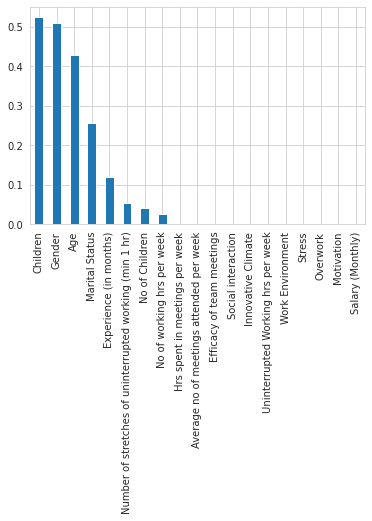

In [455]:
p_values.plot.bar()

From the above results, it is clear that the factors which affect a person's productivity are 
- No of Children
- No of working hrs per week
- Hrs spent in meetings per week
- Average no of meetings attended per week
- Efficacy of team meetings
- Social interaction
- Innovative Climate
- Uninterrupted Working hrs per week
- Work Environment
- Stress
- Overwork
- Motivation
- Salary (Monthly). 

In conclusion, for the above features there is evidence to reject the null hypothesis that the outcome variable and each of these features are dependent. Thus, these features contribute to the productivity of an individual working from home.

## Modelling

In [456]:
df_clean_scale_q=pre.minmax_scale(productivity)

In [457]:
df_clean_scale_q=pd.DataFrame(df_clean_scale_q,columns=productivity.columns.tolist())

In [458]:
X_1 = df_clean_scale_q.drop(['EP Outcome'], axis=1)

y_1 = productivity.iloc[:,19:20]

In [459]:
#SMOTE
x_smote1, y_smote1 = smote.fit_resample(X_1, y_1)

In [460]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_smote1, y_smote1, test_size = 0.3, random_state = 0)

In [461]:
X_train1.shape, X_test1.shape

((282, 19), (122, 19))

### Decision Tree

In [462]:
dtc.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [463]:
y_pred_DT1 = dtc.predict(X_test1)

In [464]:
accuracy_score(y_test1,y_pred_DT1)

0.9672131147540983

In [465]:
cmDT1 = confusion_matrix(y_test1, y_pred_DT1)

print('Confusion matrix\n\n', cmDT1)

Confusion matrix

 [[61  1]
 [ 3 57]]


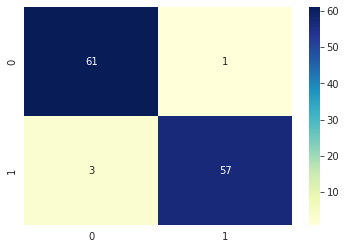

In [466]:
cm_matrix1 = pd.DataFrame(data=cmDT1)

sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='YlGnBu')

In [467]:
print(classification_report(y_test1, y_pred_DT1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.98      0.95      0.97        60

    accuracy                           0.97       122
   macro avg       0.97      0.97      0.97       122
weighted avg       0.97      0.97      0.97       122



The accuracy of prediction is 97%. The F1 score for class 0 and class 1 are both 97%.

# II - Preference

## Data
Dataset, Data Description and Data information

In [468]:
pd.set_option('display.max_columns', None)
preference = pd.read_csv("/content/Preference.csv")
preference.head()

,Gender,Age,Marital Status,Children,No of Children,Distance,Cost of commute(per month),Flexibility,Safety,Physical Exercise,Family Time,Mental Health,Care for elders,Pref Outcome
0,Female,23,Single,N,0,25,1276,5,4,5,4,5,3,1
1,Male,24,Single,N,0,16,817,5,3,4,4,5,4,1
2,Male,24,Single,N,0,9,459,4,4,3,3,4,5,1
3,Male,22,Single,N,0,30,1531,2,3,1,3,3,4,0
4,Male,25,Married,Y,1,22,1123,5,4,3,4,5,4,1


**Data Description**
- Gender - Male/Female
- Age
- Marital Status - Whether married or not - Single / Married
- Children - Whether the individual has children or not - Y/N
- No of children 
- Distance - Distance of the individual's home from the workplace in km
- Cost of Commute - The average amount of money spent on commuting per month
- Flexibilty - Whether the individual finds flexibility in working from home - expressed on a Likert scale from 1 to 5
- Safety - Whether the individual feels safer while working from home - expressed on a Likert scale from 1 to 5
- Physical Exercise - Whether the individual finds more time to be physically fit - expressed on a Likert scale from 1 to 5
- Family Time - Whether the time spent with his/her family has changed - expressed on a Likert scale from 1 to 5
- Mental Health - Whether the individual finds any impact on mental health wrt WFH conditions - expressed on a Likert scale from 1 to 5
- Care for elders - Whether the individual finds more time to look after the elders in the family - expressed on a Likert scale from 1 to 5
- Pref Outcome - What is the preference of the individual towards WFH - 0(not preferred)/1(preferred)

In [469]:
preference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      250 non-null    object
 1   Age                         250 non-null    int64 
 2   Marital Status              250 non-null    object
 3   Children                    250 non-null    object
 4   No of Children              250 non-null    int64 
 5   Distance                    250 non-null    int64 
 6   Cost of commute(per month)  250 non-null    int64 
 7   Flexibility                 250 non-null    int64 
 8   Safety                      250 non-null    int64 
 9   Physical Exercise           250 non-null    int64 
 10  Family Time                 250 non-null    int64 
 11  Mental Health               250 non-null    int64 
 12  Care for elders             250 non-null    int64 
 13  Pref Outcome                250 non-null    int64 

In [470]:
preference.isnull().sum()
# No null values

Gender                        0
Age                           0
Marital Status                0
Children                      0
No of Children                0
Distance                      0
Cost of commute(per month)    0
Flexibility                   0
Safety                        0
Physical Exercise             0
Family Time                   0
Mental Health                 0
Care for elders               0
Pref Outcome                  0
dtype: int64

In [471]:
preference.duplicated().sum()
# No duplicate records

0

In [472]:
preference.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,250.0,23.960,0.976840,22.0,23.0,24.0,25.0,25.0
No of Children,250.0,0.260,0.608177,0.0,0.0,0.0,0.0,2.0
Distance,250.0,19.116,6.460767,8.0,14.0,19.0,25.0,30.0
Cost of commute(per month),250.0,975.708,329.792034,408.0,715.0,970.0,1276.0,1531.0
Flexibility,250.0,3.556,1.143720,1.0,3.0,4.0,4.0,5.0
Safety,250.0,3.992,0.801565,3.0,3.0,4.0,5.0,5.0
Physical Exercise,250.0,3.584,1.131399,1.0,3.0,4.0,4.0,5.0
Family Time,250.0,3.636,0.877830,2.0,3.0,4.0,4.0,5.0
Mental Health,250.0,3.452,1.264155,1.0,3.0,3.0,5.0,5.0
Care for elders,250.0,3.708,0.960430,2.0,3.0,4.0,5.0,5.0


In [473]:
preference.describe(include =['O']).T

,count,unique,top,freq
Gender,250,2,Male,130
Marital Status,250,2,Single,163
Children,250,2,N,197


## Exploratory Data Analysis on Preference of Employees

### 1. Outlier analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text major ticklabel objects>)

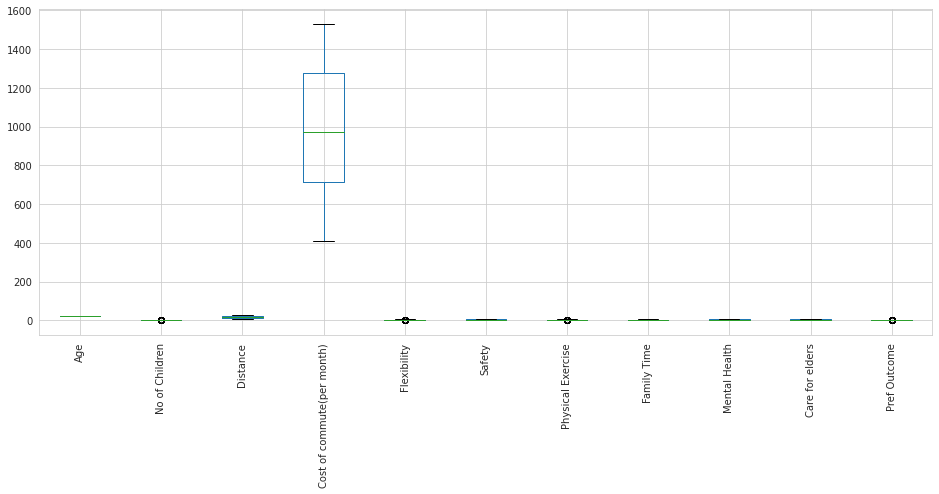

In [474]:
preference.plot.box(figsize = (16,6))
plt.xticks(rotation = 90)

The plot above does not show any significant outliers. However, the scale of representation is distorted by the plot of Cost of commute. Therefore, it is removed and replotted to get a clearer picture of the outliers.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

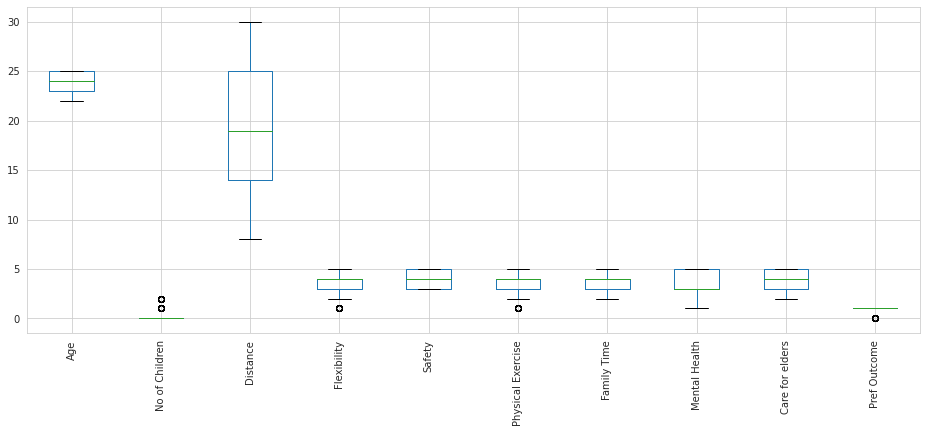

In [475]:
df1 = preference.drop(["Cost of commute(per month)"], axis = 1)
df1.plot.box(figsize = (16,6))
plt.xticks(rotation = 90)

There are very few outliers and not severe in nature. However, since Distance again distorts the representation, the feature is removed and replotted in the next plot.

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

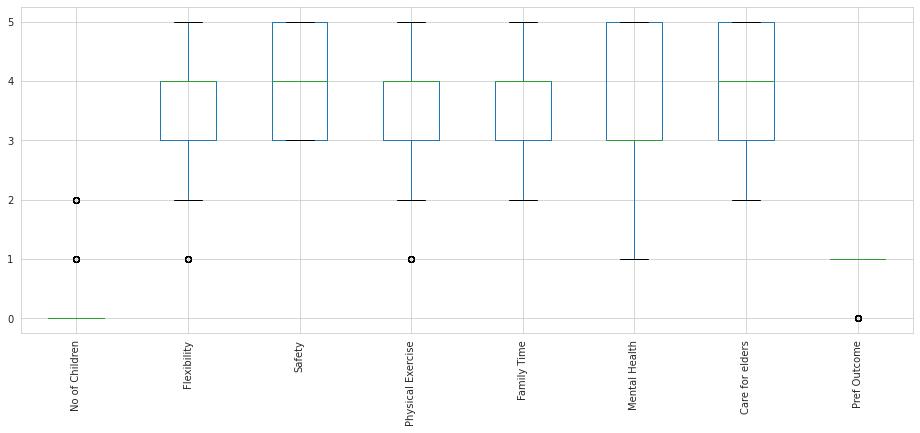

In [476]:
df2 = df1.drop(["Distance","Age"], axis = 1)
df2.plot.box(figsize = (16,6))
plt.xticks(rotation = 90)

There are very few outliers and not severe in nature. In this particular case study, the presence of outliers is  important in the data to analyse the variety of responses.

### 2. Data Visualisation

In [477]:
#function for crosstabs
def cross_tab(x,y):
    crtab = pd.crosstab(preference[x], preference[y])
    return crtab

In [478]:
#Preference of the people

p = preference['Pref Outcome'].value_counts()
print(p)

1    208
0     42
Name: Pref Outcome, dtype: int64


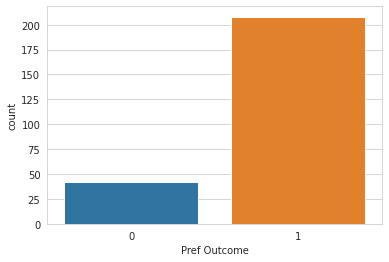

In [479]:
sns.countplot(x=preference['Pref Outcome'])

Majority of the employees prefer work from home.

In [480]:
#Age v/s Pref Outcome

cross_tab('Age','Pref Outcome')

Pref Outcome,0,1
Age,,
22,12,9
23,7,54
24,9,66
25,14,79


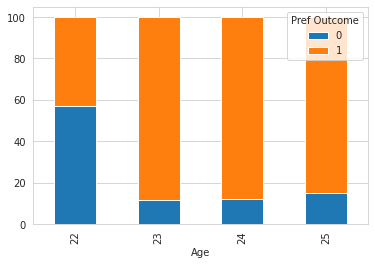

In [481]:
table=pd.crosstab(preference['Age'],preference['Pref Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

The large majority in the age category of 23-25 prefer WFH, while most of the ones of age 22 prefer to work from office.

In [482]:
#Gender v/s Pref Outcome

cross_tab('Gender','Pref Outcome')

Pref Outcome,0,1
Gender,,
Female,19,101
Male,23,107


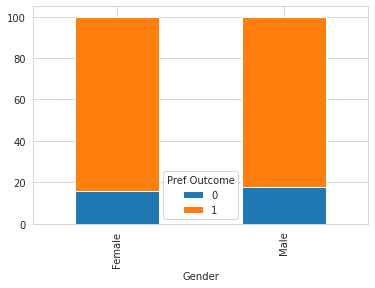

In [483]:
table=pd.crosstab(preference['Gender'],preference['Pref Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

Almost 85% of both males and females prefer to work from home.

In [484]:
#Marital Status v/s Pref Outcome

cross_tab('Marital Status','Pref Outcome')

Pref Outcome,0,1
Marital Status,,
Married,12,75
Single,30,133


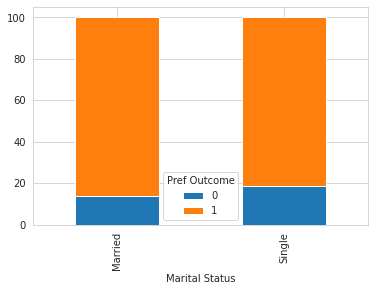

In [485]:
table=pd.crosstab(preference['Marital Status'],preference['Pref Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

Almost 80% of those who are both married and unmarried prefer to work from home.

In [486]:
#Children v/s Pref Outcome

cross_tab('Children','Pref Outcome')

Pref Outcome,0,1
Children,,
N,30,167
Y,12,41


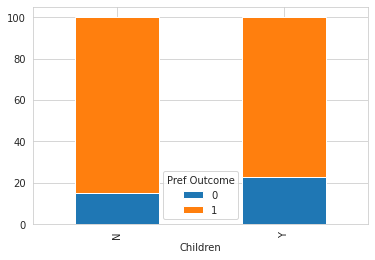

In [487]:
table=pd.crosstab(preference['Children'],preference['Pref Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

Almost 80% of all employees, both having children and without children, prefer to work from home.

In [488]:
#No of childern v/s Pref Outcome

cross_tab('No of Children','Pref Outcome')

Pref Outcome,0,1
No of Children,,
0,36,171
1,3,18
2,3,19


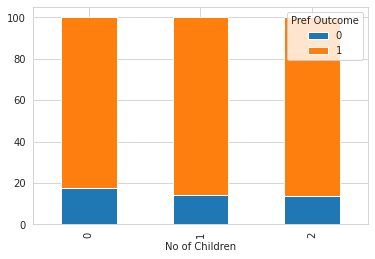

In [489]:
table=pd.crosstab(preference['No of Children'],preference['Pref Outcome'])
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

The above plot corroborates the previous observation.


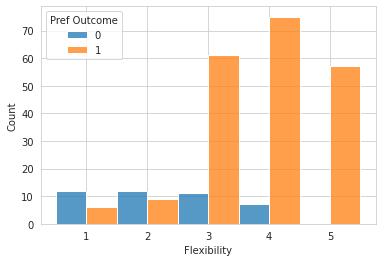

In [490]:
# Flexibility v/s Pref Outcome

sns.histplot(preference, x="Flexibility", hue="Pref Outcome", discrete=True, multiple="dodge")

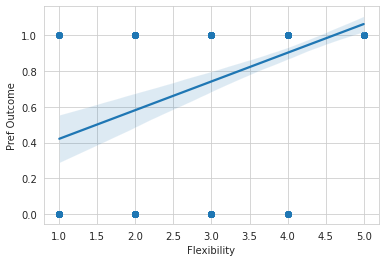

In [491]:
sns.regplot(x="Flexibility", y="Pref Outcome", data=preference)

The majority of the employees who prefer WFH feel that flexibility is more in WFH.

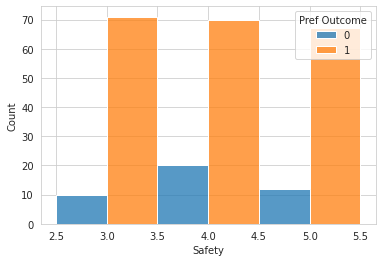

In [492]:
# Safety v/s Pref Outcome

sns.histplot(preference, x="Safety", hue="Pref Outcome", discrete=True, multiple="dodge")

Majority of the employees feel that safety is more in a WFH scenario.

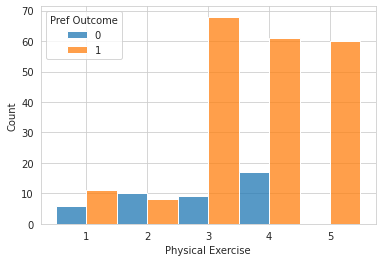

In [493]:
# Physical Exercise v/s Pref Outcome

sns.histplot(preference, x="Physical Exercise", hue="Pref Outcome",discrete=True, multiple="dodge")

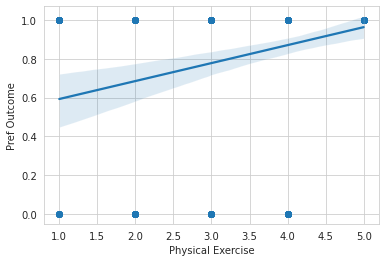

In [494]:
sns.regplot(x="Physical Exercise", y="Pref Outcome", data=preference)

The employees who prefer work from home feel that they get more opportunities to be physically fit.

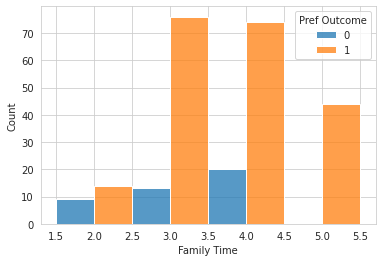

In [495]:
# Family Time v/s Pref Outcome

sns.histplot(preference, x="Family Time", hue="Pref Outcome",discrete=True,multiple="dodge")

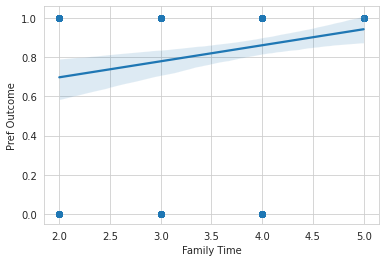

In [496]:
sns.regplot(x="Family Time", y="Pref Outcome", data=preference)

Majority of the employees who want to WFH feel that they get more family time.

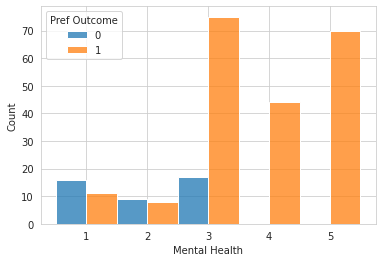

In [497]:
# Mental Health v/s Pref Outcome

sns.histplot(preference, x="Mental Health", hue="Pref Outcome",discrete=True,multiple="dodge")

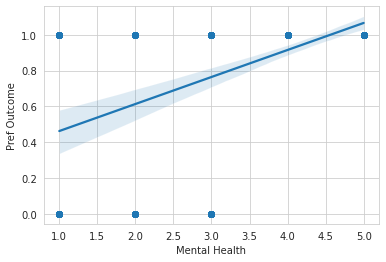

In [498]:
sns.regplot(x="Mental Health", y="Pref Outcome", data=preference)

Majority of the employees who want to WFH feel that they are more mentally healthy.

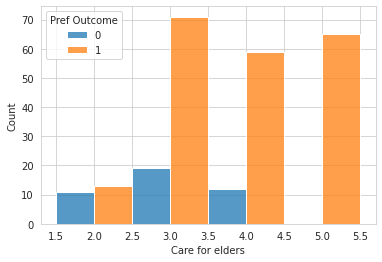

In [499]:
# Care for elders v/s Pref Outcome

sns.histplot(preference, x="Care for elders", hue="Pref Outcome",discrete=True,multiple="dodge")

Majority of the employees who want to WFH feel that they get more time to care for their elders.

## Statistical Analysis and Hypothesis Testing

### 1 Correlation

In [500]:
preference.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,250.0,23.960,0.976840,22.0,23.0,24.0,25.0,25.0
No of Children,250.0,0.260,0.608177,0.0,0.0,0.0,0.0,2.0
Distance,250.0,19.116,6.460767,8.0,14.0,19.0,25.0,30.0
Cost of commute(per month),250.0,975.708,329.792034,408.0,715.0,970.0,1276.0,1531.0
Flexibility,250.0,3.556,1.143720,1.0,3.0,4.0,4.0,5.0
Safety,250.0,3.992,0.801565,3.0,3.0,4.0,5.0,5.0
Physical Exercise,250.0,3.584,1.131399,1.0,3.0,4.0,4.0,5.0
Family Time,250.0,3.636,0.877830,2.0,3.0,4.0,4.0,5.0
Mental Health,250.0,3.452,1.264155,1.0,3.0,3.0,5.0,5.0
Care for elders,250.0,3.708,0.960430,2.0,3.0,4.0,5.0,5.0


In [501]:
# Checking the correlation between the features and the outcome variable.
pd.DataFrame(abs(preference.corr()['Pref Outcome']).sort_values(ascending = False))

,Pref Outcome
Pref Outcome,1.000000
Mental Health,0.508685
Flexibility,0.490713
Care for elders,0.320756
Physical Exercise,0.279790
Family Time,0.191882
Age,0.168132
No of Children,0.033844
Safety,0.031243
Cost of commute(per month),0.021853


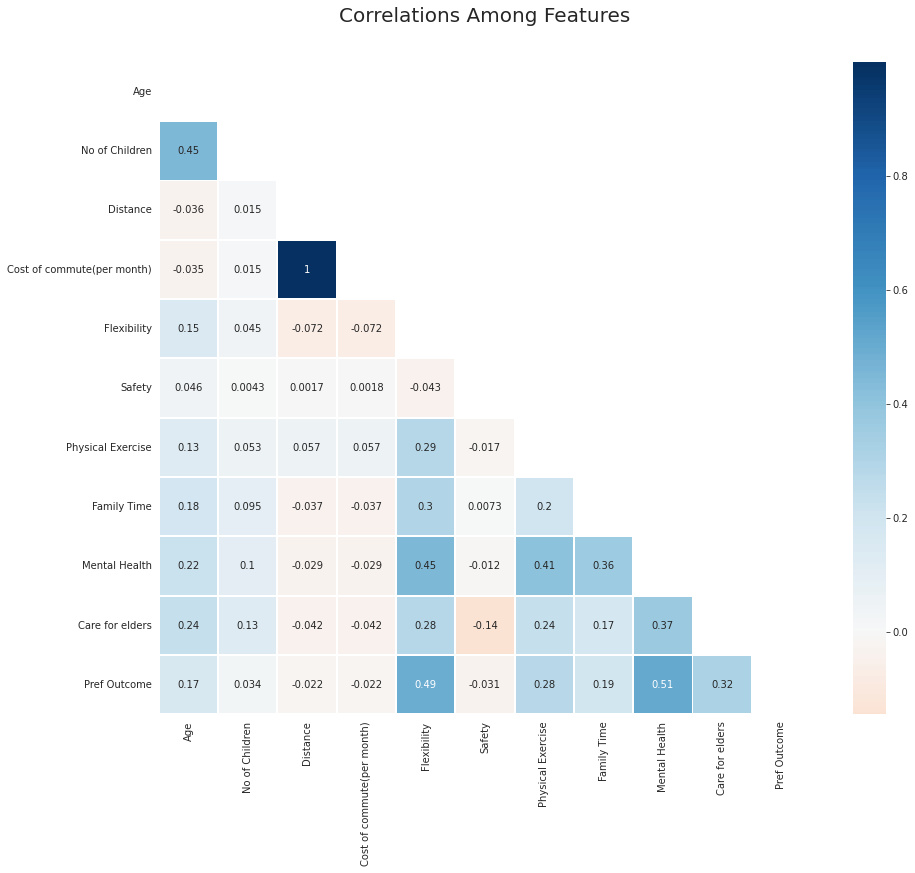

In [502]:
mask = np.zeros_like(preference.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(preference.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

### 2 Hypothesis Testing

H0 : The outcome variable is independent of the independent variables.

H1: The outcome variable is not independent of the independent variables.

To check these hypotheses, Chi Square test will be carried out.

In [503]:
preference_chi=preference.copy()

In [504]:
preference_chi['distance_bin']=pd.cut(preference_chi['Distance'], bins=[7,13,19,25,30], 
                               labels=[1,2, 3, 4])
preference_chi['cost_of_commute_bin']=pd.cut(preference_chi['Cost of commute(per month)'], bins=[400,800,1200,1600], 
                               labels=[1,2, 3])
preference_chi.drop(['Distance','Cost of commute(per month)'],axis=1, inplace=True)

In [505]:
preference_chi.columns

Index(['Gender', 'Age', 'Marital Status', 'Children', 'No of Children',
       'Flexibility', 'Safety', 'Physical Exercise', 'Family Time',
       'Mental Health', 'Care for elders', 'Pref Outcome', 'distance_bin',
       'cost_of_commute_bin'],
      dtype='object')

In [506]:
def crosstab_(feature):
    tab=pd.crosstab(preference_chi["Pref Outcome"], preference_chi[feature], margins = True,  margins_name="Total")
    #print("Crosstabulation for ", feature, "\n", tab)
    # significance level
    alpha = 0.05
    # Calcualtion of Chisquare test statistics
    chi_square = 0
    rows = preference_chi["Pref Outcome"].unique()
    #print("rows",rows)
    columns = preference_chi[feature].unique()
    #print("columns", columns)
    for i in columns:
        for j in rows:
            O = tab[i][j]
            E = tab[i]['Total'] * tab['Total'][j] / tab['Total']['Total']
            chi_square += (O-E)**2/E
    # The p-value approach
    #print("For ", feature)
    p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    conclusion = "Failed to reject the null hypothesis."
    if p_value <= alpha:
        conclusion = "Null Hypothesis is rejected."
    table.append([feature, p_value, conclusion])
    #print("chisquare-score is:", chi_square, " and p value is:", p_value)
    #print(conclusion)

In [507]:
table=[]
cols=['Gender', 'Age', 'Marital Status', 'Children', 'No of Children',
       'Flexibility', 'Safety', 'Physical Exercise', 'Family Time',
       'Mental Health', 'Care for elders', 'distance_bin',
       'cost_of_commute_bin']
for x in cols:
    crosstab_(x)
chisq_pref = pd.DataFrame(table, columns=['features', 'p value', 'verdict'])
chisq_pref.sort_values(by=['p value'], inplace=True, ascending=False)   
chisq_pref

,features,p value,verdict
12,cost_of_commute_bin,0.970083,Failed to reject the null hypothesis.
4,No of Children,0.955030,Failed to reject the null hypothesis.
0,Gender,0.801147,Failed to reject the null hypothesis.
11,distance_bin,0.599311,Failed to reject the null hypothesis.
2,Marital Status,0.554433,Failed to reject the null hypothesis.
3,Children,0.260444,Failed to reject the null hypothesis.
6,Safety,0.117147,Failed to reject the null hypothesis.
1,Age,0.000000,Null Hypothesis is rejected.
5,Flexibility,0.000000,Null Hypothesis is rejected.
7,Physical Exercise,0.000000,Null Hypothesis is rejected.


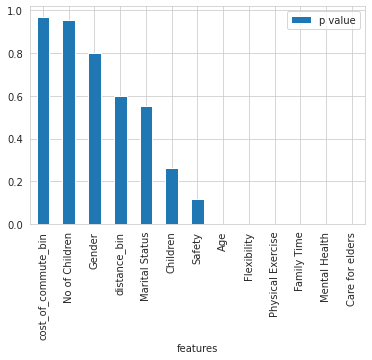

In [508]:
chisq_pref.plot(x ='features', y='p value', kind = 'bar')

From the above results, it is clear that the factors which affect a person's preference are Age, Flexibility, Physical Exercise, Family Time, Mental Health and Care for elders.
For Cost of Commute, No of children, Gender, Distance, Safety, Marital Status and Children there is no evidence to reject the Null Hypothesis that the outcome variable and each of these independent variables are independent.
In conclusion, for Age, Flexibility, Physical Exercise, Family Time, Mental Health and Care for elders there is evidence to reject the null hypothesis that the outcome variable and each of these factors are dependent. Thus, these features contribute to the preference of an individual working from home.

## Modelling

In [509]:
preference['Gender']=preference['Gender'].replace({'Female':0, 'Male':1})
preference['Marital Status']=preference['Marital Status'].replace({'Single':0, 'Married':1})
preference['Children']=preference['Children'].replace({'N':0, 'Y':1})
preference

,Gender,Age,Marital Status,Children,No of Children,Distance,Cost of commute(per month),Flexibility,Safety,Physical Exercise,Family Time,Mental Health,Care for elders,Pref Outcome
0,0,23,0,0,0,25,1276,5,4,5,4,5,3,1
1,1,24,0,0,0,16,817,5,3,4,4,5,4,1
2,1,24,0,0,0,9,459,4,4,3,3,4,5,1
3,1,22,0,0,0,30,1531,2,3,1,3,3,4,0
4,1,25,1,1,1,22,1123,5,4,3,4,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,25,1,1,1,19,970,3,5,4,3,2,3,0
246,0,25,0,0,0,16,817,2,5,1,2,2,3,1
247,0,25,1,0,0,9,459,4,4,2,3,3,4,0
248,1,24,0,0,0,10,510,3,5,3,5,4,5,1


In [510]:
features=preference.drop('Pref Outcome', axis=1)
outcome=preference['Pref Outcome']
df_pref=pre.minmax_scale(features)

In [511]:
#To balance the data

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(features, outcome)

In [512]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 0)

In [513]:
X_train.shape, X_test.shape

((291, 13), (125, 13))

### Decision Tree

In [514]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [515]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [516]:
y_pred_DT = dtc.predict(X_test)

In [517]:
accuracy_score(y_test,y_pred_DT)

0.944

In [518]:
cmDT = confusion_matrix(y_test, y_pred_DT)

print('Confusion matrix\n\n', cmDT)

Confusion matrix

 [[58  4]
 [ 3 60]]


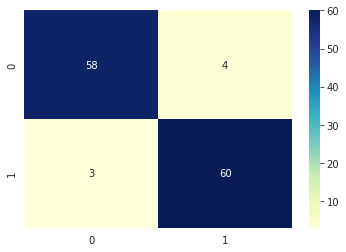

In [519]:
cm_matrix = pd.DataFrame(data=cmDT)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [520]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.94      0.95      0.94        63

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



The accuracy of prediction is 94%. The F1 score for class 0 and class 1 are both 94%.

# Conclusion

The objectives of this exercise were :-
-  To find out whether working from home affects employee productivity.
-  To find out what do employees prefer and why.

Taking the first point, from the study carried out above, it is amply clear that majority of the employees had improved productivity, which has also been brought out in the research papers that were referred. The reasons which contributed to employee productvity are :-
- No of children
- No of working hrs per week
- Hrs spent in meetings
- Average no of meetings attended per week
- Efficacy of team meetings
- Social interactions
- Innovative climate
- Uninterrupted working hrs per week
- Work environment
- Stress
- Overwork
- Motivation
- Salary

The pointers are mainly towards all factors which ensure a proper balance between work and home. No doubt, the commitment for work is there - which is indicated by the emphasis towards encouragement towards innovation, positive work culture, and undisturbed time towards work. At the same time no of children is a factor contributing to higher productivity, probably because presence of children makes it more imperative to retain the job.

For the second point, majority of the employees prefer WFH regimen. The reasons that came to fore are :-
- Age
- Flexibility
- Physical Exercise
- Family Time
- Mental Health
- Care for elders

Basically, the underlying factors points towards more availability of time which an individual is channeling towards issues of personal priority i,e, better work-life balance.

# Business Context

WFH has come into sharp focus after hundreds of professionals were forced to adopt it full-time after Covid-19 hit. It has forced companies to adapt, improvise and innovate ways of working. However, WFH has been followed by many of these companies for years - been provided to persons based on distance from workplace, ability to monitor progress online, ability to participate in business meetings effectively etc. In the US itself, even before the pandemic, there were over 5 million employees working from home at least half the time. The bottom line for providing WFH has been  performance, while balancing personal requirement, to whatever extent allowable by the company.

However, ever since Covid-19 struck operations, the companies had no option but to improvise on this arrangement. As a result, all operations shifted online. This brought forth advantages that accrued from this new modus operandi such as sharply reduced requirement of leased workspace. This has to be viewed in light of varying efficiencies of employees. Achieving same overall productivity is a team effort, and when people are not under the watchful eye of the supervisor, there can be trust issues within the team. One of the factors which was brought out in the papers was inability to know what other team members were working on due to lack of social interaction. Working from Home requires more self-discipline and it can impact team productivity.

Such and other factors brought focus on the managerial style of the manager / supervisor. A good manager would be able to harness the potential of the team while keeping track of factors affecting them inclementally. Thats why during this WFH stage, empathy among employees increased, deliberate informal sessions and No-meeting-Fridays were implemented in conjunction with other measures. Regular feedback from the employees was taken on their well being. As a result mental health came into prominence. Better employees could manage personal and social impact better.

Now that people were home, creating a concerted schedule to address work requirements, disciplining oneself to meet punctuality requirements, belying the illusion that the person is more available for home requiremnts during working hours, meeting business targets in a non-office environment etc were faced. 

All these factors impinged on productivity of the teams and consequent business output of the company. Overall, it was found that for WFH to be beneficial to the company, apart from motivated employees it required effective substitute for the social disconnect which people started feeling a lack of, focussed meetings (it is easy to get carried away in discussions when not facing time constraints), peer interaction to counter loneliness, wellness interactions, periodic encouragement etc. 

Change is often tough, but it can also be very rewarding. The increase in employees working from home will have impact, both good and bad, on individual employees, the organizations they work for and the larger economy. For the companies, the struggle can simply mean changing the process and putting the right collaboration/communication tools in place. 

Companies such as Microsoft kept a track of its employees and were able to address their concerns and changing requirements effectively. As a result they were able to ensure consistent productivity. However, the same may not be possible by similarly impacted companies with the same effectiveness. Hence, companies need to take a hard and fast look at progress of each team and institute measures to tackle issues thrown up by WFH in the new scenario. 

What worked before may not work anymore. Some organizations will eventually have their employees return to an office or building. Others will adapt to a new way of business with WFH employees. One is not necessarily better than the other. If we were to look for a silver lining, the pandemic gave many companies the opportunity to test the waters and discover new ways of doing business that may continue to work for them—and their employees—long into the future.



# References

1.	C. Miller, P. Rodeghero, M. -A. Storey, D. Ford and T. Zimmermann, "Survey Instruments for "How Was Your Weekend?" Software Development Teams Working from Home During COVID-19," 2021 IEEE/ACM 43rd International Conference on Software Engineering: Companion Proceedings (ICSE-Companion), 2021, pp. 223-223, doi: 10.1109/ICSE-Companion52605.2021.00101. 

2.	K. D. Flack, S. R. Lenton, A. Murphy and A. Pilkington, "How we made homeworking work for us," IEE Colloquium on The Home as an Office, 1996, pp. 6/1-6/3, doi: 10.1049/ic:19960271.

3.	M. L. Watkins, "Working from home," University as a Bridge from Technology to Society. IEEE International Symposium on Technology and Society (Cat. No.00CH37043), 2000, pp. 127-132, doi: 10.1109/ISTAS.2000.915590.

4.	M. Blake, "Information for home-based teleworkers," IEE Colloquium on The Home as an Office, 1996, pp. 4/1-4/6, doi: 10.1049/ic:19960269.

5.	S. Jaffe, "Work from home During and After COVID-19," 2021 IEEE/ACM 8th International Workshop on Software Engineering Research and Industrial Practice (SER&IP), 2021, pp. 28-28, doi: 10.1109/SER-IP52554.2021.00012.

6.	E. Clark, "Telecommuting and working from home," IPCC 98. Contemporary Renaissance: Changing the Way we Communicate. Proceedings 1998 IEEE International Professional Communication Conference (Cat. No.98CH36332), 1998, pp. 21-25 vol.2, doi: 10.1109/IPCC.1998.722074.

7.	J. Butler and S. Jaffe, "Challenges and Gratitude: A Diary Study of Software Engineers Working From Home During Covid-19 Pandemic," 2021 IEEE/ACM 43rd International Conference on Software Engineering: Software Engineering in Practice (ICSE-SEIP), 2021, pp. 362-363, doi: 10.1109/ICSE-SEIP52600.2021.00047.

8.	M. Maternaghan, "Workplace 2000," IEE Colloquium on The Home as an Office, 1996, pp. 7/1-7/5, doi: 10.1049/ic:19960272.

9.	T. Golden, "Technology and the balance of work family conflict: an investigation into the role of telecommuting," IEMC '03 Proceedings. Managing Technologically Driven Organizations: The Human Side of Innovation and Change, 2003, pp. 439-442, doi: 10.1109/IEMC.2003.1252310.

10.	L. Ahuja, A. Rana and S. Gupta, "Security & Privacy Model for Work from Home Paradigm," 2020 8th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO), 2020, pp. 1351-1355, doi: 10.1109/ICRITO48877.2020.9197773.

11.	 Longqi Yang, Sonia Jaffe, David Holtz, Siddharth Suri, Shilpi Sinha, Jeffrey Weston, Connor Joyce, Neha Shah, Kevin Sherman, CJ Lee, Brent Hecht and Jaime Teevan,  “How Work From Home Affects Collaboration: A Large-Scale Study of Information Workers in a Natural Experiment During COVID-19”, Microsoft Corporation

12.	Denae Ford, Margaret-Anne Storey, Thomas Zimmermann, Christian Bird, Sonia Jaffe, Chandra Maddila, Jenna L. Butler, Brian Houck, Nachiappan Nagappan, A Tale of Two Cities: Software DevelopersWorking from Home During the COVID-19 Pandemic”, arXiv:2008.11147v3 [cs.SE] 10 Sep 2021

13.	Esra Thorstensson, “The Influence of Working from Home on Employees' Productivity : Comparative document analysis between the years 2000 and 2019-2020”, Karlstad Business School publication

14.	Prithwiraj (Raj) Choudhury, Cirrus Foroughi, Barbara Larson, “Work-From-Anywhere: The Productivity Effects of Geographic Flexibility”, Harvard Business School publication

15.	Bloom, Nicholas, J. Joseph Beaulieu, James Liang, Donald John Roberts and Zhichun Jenny Ying. “Does Working from Home Work? Evidence from a Chinese Experiment.” Kauffman: Large Research Projects - NBER (Topic) (2013): n. pag. 54

16. Øystein Tønnessen, Amandeep Dhir, Bjørn-Tore Flåten, Digital knowledge sharing and creative performance: Work from home during the COVID-19 pandemic, Technological Forecasting and Social Change, Volume 170, 2021, 120866, ISSN 0040-1625, https://doi.org/10.1016/j.techfore.2021.120866.

17. Kramer, Amit and Karen Z. Kramer. “The potential impact of the Covid-19 pandemic on occupational status, work from home, and occupational mobility.” Journal of Vocational Behavior 119 (2020): 103442 - 103442.

18. Galanti, Teresa MPsyc; Guidetti, Gloria PhD; Mazzei, Elisabetta MPsyc; Zappalà, Salvatore PhD; Toscano, Ferdinando MPsyc Work From Home During the COVID-19 Outbreak, Journal of Occupational and Environmental Medicine: July 2021 - Volume 63 - Issue 7 - p e426-e432 doi: 10.1097/JOM.0000000000002236

19. E. Thorstensson, ‘The Influence of Working from Home on Employees’ Productivity : Comparative document analysis between the years 2000 and 2019-2020’, Dissertation, 2020.

20. https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

21. https://www.forbes.com/sites/shephyken/2021/02/28/the-impact-of-the-virtual-work-from-home-workforce/?sh=1febafc82873

22. Shrivastava A, Sharma MK, Marimuthu P. Internet use at workplaces and its effects on working style in indian context: An exploration. Indian J Occup Environ Med. 2016;20(2):88-94. doi:10.4103/0019-5278.197531

23. https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

24. https://support.optimizely.com/hc/en-us/articles/4410282998541-Design-an-effective-hypothesis

25. https://online.hbs.edu/blog/post/hypothesis-testing

26. Teodorovicz T, Sadun R, Kun AL, Shaer O. Working from Home during COVID19: Evidence from Time-Use Studies, 2021, Working Paper, Harvard Business School.

27. Gibbs M, Mengel F, and Siemroth C. Work from Home & Productivity:
Evidence from Personnel & Analytics Data on IT Professionals, 2021, Working Paper, Becker Friedman Institute.
 